# Approximation of functions

You have the complex function on interval [1, 15]:

```
f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
```

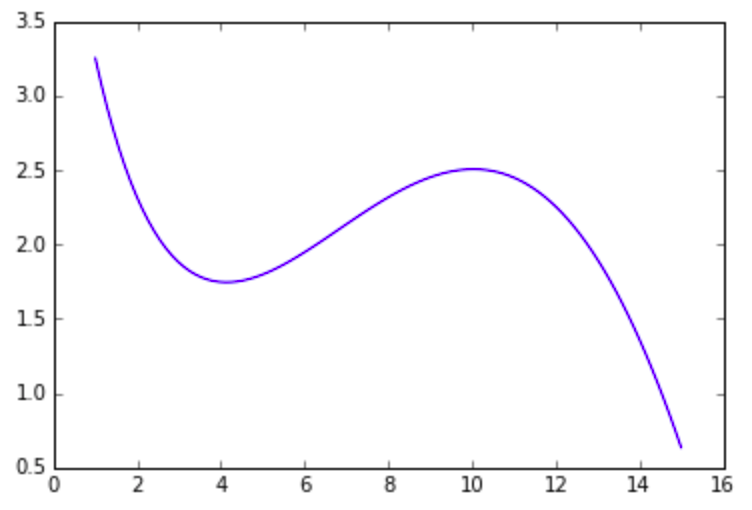

The task of machine learning is to approximate a complex dependency using a function from a particular family. In this task we will approximate the specified function using polynomials.

In [0]:
# Imports
import numpy as np
import scipy as sp
import scipy.spatial
import matplotlib as mpl
from matplotlib import pylab as plt
import pandas as pd

%matplotlib inline

import re

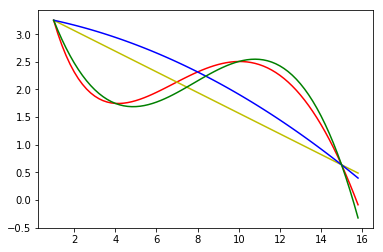

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [5]:
# Original function
def f(x):
  return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

# Find coefficients for my approximate function
def coefficients(points, f):
  coordinates = np.array(points)
  length = len(coordinates)
  a = np.empty((0, length))
  for i in range(length):
    line = list()
    for j in range(length):
      line.append(coordinates[i] ** j)
    a = np.append(a, np.array([line]), axis = 0)
  b = np.array([f(coordinate) for coordinate in coordinates])
  x = sp.linalg.solve(a, b)
  return x

# My attempt to approximate
def myf(x, points):
  result = 0
  solution = coefficients(points, f)
  length = len(solution)
  for i in range(length):
    result += solution[i] * x ** i
  return result


# Original
x = np.arange(1, 16, 0.2)
y = f(x)
plt.plot(x, y, 'r')

# 2 points
x = np.arange(1, 16, 0.2)
y = myf(x, [1, 15])
plt.plot(x, y, 'y')

# 3 points
x = np.arange(1, 16, 0.2)
y = myf(x, [1, 8, 15])
plt.plot(x, y, 'b')

# 4 points
x = np.arange(1, 16, 0.2)
y = myf(x, [1, 4, 10, 15])
plt.plot(x, y, 'g')

# Visualize
plt.show()
print(coefficients([1, 4, 10, 15], f))

In [0]:
with open('submission-2.txt', 'w') as fl:
  result = " ".join([str(i) for i in coefficients([1, 4, 10, 15], f).tolist()])
  fl.write(result)